<a href="https://colab.research.google.com/github/mgfalzon/Final-Tutorial/blob/main/Matt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![title](https://github.com/mgfalzon/Final-Tutorial/blob/main/all_pokemons.png?raw=1)

### **Predicting Pokemon Battle Outcomes Through Stats**

Matthew Falzon, Robert Calkins, Michael Bailey

#### **Introduction**

*insert Pokemon introduction*

#### **Python Libraries**

In [2]:
import requests
import json
import numpy as np
import pandas as pd
import re

#### **Importing Data**

In [62]:
path = "https://raw.githubusercontent.com/mgfalzon/Final-Tutorial/main"
combats = pd.read_csv(f"{path}/combats.csv")
pokemon = pd.read_csv(f"{path}/pokemon.csv")
tests = pd.read_csv(f"{path}/tests.csv")
display("Pokemon", pokemon.head())
display("Combats", combats.head())

'Pokemon'

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


'Combats'

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


#### **Tidy Data**

In [12]:
# Find missing data
pokemon.isna().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

<sub>*Note: type 2 is missing because some pokemon only have one type</sub>

In [13]:
# One pokemon is missing from the data
missing = pokemon[pokemon['Name'].isna()]
missing

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [23]:
# Take a look at the surrounding pokemon
miss_id = missing.index[0]
pokemon[miss_id - 3 : miss_id + 3]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,1,False
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False


In [25]:
# Use the pokeAPI in order to find the missing pokemon
def pokeAPI(s):
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{s}")
    return json.loads(r.content)

In [57]:
# Check the pokemon after Mankey in the pokeAPI
res = pokeAPI('mankey')
res = pokeAPI(res['id'] + 1)
display(res['name'], res['types'], res['stats'])

'primeape'

[{'slot': 1,
  'type': {'name': 'fighting', 'url': 'https://pokeapi.co/api/v2/type/2/'}}]

[{'base_stat': 65,
  'effort': 0,
  'stat': {'name': 'hp', 'url': 'https://pokeapi.co/api/v2/stat/1/'}},
 {'base_stat': 105,
  'effort': 2,
  'stat': {'name': 'attack', 'url': 'https://pokeapi.co/api/v2/stat/2/'}},
 {'base_stat': 60,
  'effort': 0,
  'stat': {'name': 'defense', 'url': 'https://pokeapi.co/api/v2/stat/3/'}},
 {'base_stat': 60,
  'effort': 0,
  'stat': {'name': 'special-attack',
   'url': 'https://pokeapi.co/api/v2/stat/4/'}},
 {'base_stat': 70,
  'effort': 0,
  'stat': {'name': 'special-defense',
   'url': 'https://pokeapi.co/api/v2/stat/5/'}},
 {'base_stat': 95,
  'effort': 0,
  'stat': {'name': 'speed', 'url': 'https://pokeapi.co/api/v2/stat/6/'}}]

In [63]:
# Clean stats for readability
data = {stat['stat']['name'] : stat['base_stat'] for stat in res['stats']}
data['type'] = res['types'][0]['type']['name']
df = pd.DataFrame(data, [res['name']])
display("pokeAPI Data", df)
display("Our Data", missing.iloc[:,1:10])

'pokeAPI Data'

,hp,attack,defense,special-attack,special-defense,speed,type
primeape,65,105,60,60,70,95,fighting


'Our Data'

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
62,NaN,Fighting,NaN,65,105,60,60,70,95


It's a match!

In [ ]:
# Update the data
pokemon['Name'] = np.where(pokemon['Name'].isna(), 'Primeape', pokemon['Name'])
pokemon[miss_id - 3 : miss_id + 3]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,1,False
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False


#### **Data Exploration**

In [ ]:
# Insert Loser column
combats['Loser'] = pd.Series(np.where(combats['Winner'] == combats['First_pokemon'], combats['Second_pokemon'], combats['First_pokemon']))
combats.head(3)

,First_pokemon,Second_pokemon,Winner,Loser
0,266,298,298,266
1,702,701,701,702
2,191,668,668,191


In [ ]:
# Generate win-loss percentages
wins = combats['Winner'].value_counts().sort_index().rename('Wins')
loss = combats['Loser'].value_counts().sort_index().rename('Loss')
res = pd.concat([wins, loss], axis=1)
res['win_loss'] = res['Wins'] / (res['Wins'] + res['Loss'])
res['win_pct']  = (res['win_loss'] * 100).round(1)
res.head()

,Wins,Loss,win_loss,win_pct
1,37.0,96,0.278195,27.8
2,46.0,75,0.380165,38.0
3,89.0,43,0.674242,67.4
4,70.0,55,0.560000,56.0
5,55.0,57,0.491071,49.1


In [ ]:
# Join with pokemon table
pokemon = pokemon.join(res, on='#')

In [ ]:
# Top 50 Pokemon by win percentage
top50 = pokemon.sort_values(by='win_pct', ascending=False).head(50)
top50[['Name', 'win_pct']].head()

,Name,win_pct
154,Mega Aerodactyl,98.4
512,Weavile,97.5
703,Tornadus Therian Forme,96.8
19,Mega Beedrill,96.6
153,Aerodactyl,96.5


In [ ]:
# Bottom 50 Pokemon by win percentage
bot50 = pokemon.sort_values(by='win_pct', ascending=True).head(50)
bot50[['Name', 'win_pct']].head()

,Name,win_pct
289,Silcoon,2.2
189,Togepi,2.5
638,Solosis,3.1
236,Slugma,3.3
576,Munna,3.9


In [ ]:
# Remove Mega Pokemon
pokemon = pokemon[pokemon['Name'].str.match(r'Mega .*') == False]

# Recalculate top and bottom 50
top50 = pokemon.sort_values(by='win_pct', ascending=False).head(50)
bot50 = pokemon.sort_values(by='win_pct', ascending=True).head(50)

pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loss,win_loss,win_pct
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,96.0,0.278195,27.8
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,75.0,0.380165,38.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,43.0,0.674242,67.4
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,57.0,0.491071,49.1
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,64.0,54.0,0.542373,54.2


In [ ]:
# Non-Mega pokemon with most wins
top50[['Name', 'win_pct']].head()

,Name,win_pct
512,Weavile,97.5
703,Tornadus Therian Forme,96.8
153,Aerodactyl,96.5
726,Greninja,96.1
716,Meloetta Pirouette Forme,95.9


In [78]:
# Type frequency
type_freq = pokemon.groupby(by=['Type 1', 'Type 2'], dropna=False)['Name'].count().rename('freq')
type_freq = type_freq.sort_values(ascending=False)
pd.DataFrame(type_freq).head()

,,freq
Type 1,Type 2,
Normal,NaN,61
Water,NaN,59
Psychic,NaN,38
Grass,NaN,33
Fire,NaN,28


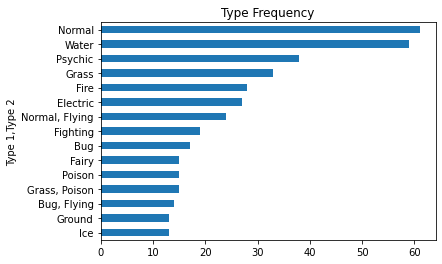

In [77]:
# Graph type frequency
ax = type_freq.head(15).plot.barh()
ax.set_title("Type Frequency")
yticks = [t1 if pd.isna(t2) else f'{t1}, {t2}' for (t1,t2) in type_freq.index]
ax.set_yticklabels(yticks)
ax.invert_yaxis()

In [ ]:
# Top 50 pokemon Type frequency
type_freq = top50.groupby(by=['Type 1', 'Type 2'], dropna=False)['Name'].count().rename('count').reset_index()
type_freq = type_freq.sort_values(by='count', ascending=False).reset_index(drop=True)
type_freq.head()

,Type 1,Type 2,count
0,Normal,NaN,5
1,Electric,NaN,5
2,Psychic,NaN,5
3,Dark,NaN,3
4,Water,NaN,2


In [ ]:
# Bottom 50 pokemon Type frequency
type_freq = bot50.groupby(by=['Type 1', 'Type 2'], dropna=False)['Name'].count().rename('count').reset_index()
type_freq = type_freq.sort_values(by='count', ascending=False).reset_index(drop=True)
type_freq.head()

,Type 1,Type 2,count
0,Bug,NaN,8
1,Psychic,NaN,7
2,Grass,NaN,4
3,Normal,NaN,4
4,Normal,Fairy,3


In [ ]:
# Split data by generation
gen = {g:df for g, df in pokemon.groupby(by='Generation')}
gen[1].head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Wins,Loss,win_loss,win_pct
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,96.0,0.278195,27.8
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,75.0,0.380165,38.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,43.0,0.674242,67.4
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,57.0,0.491071,49.1
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,64.0,54.0,0.542373,54.2


#### **Data Visualization**

#### **Analysis**